In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import arviz as az
import pymc as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import cellbayesassay as cba
import os.path
import re
import warnings
import attila_utils

## Importing data

In [2]:
data_fpath = '../../resources/cell-based-assays/data-format-specification_NIA_all-CO28151_CO28153-cleaned.xlsx'
TI_fpath = '../../resources/cell-based-assays/test-items2.csv'
controls_fpath = '../../resources/cell-based-assays/experiment-controls2.csv'
data = cba.get_data(data_fpath, 'Sheet1', TI_fpath, controls_fpath)
data

,Study,Experiment,Assay,Batch,Plate,TI,Name,conc,concentration,conc_log10,Activity
0,CO28153,LPS neuroinflammation (BV2 cells),IFN-γ,3,1,LPS,,NaN,1.000000e-09,-9.0,0.043041
1,CO28153,LPS neuroinflammation (BV2 cells),IFN-γ,3,1,LPS,,NaN,1.000000e-09,-9.0,0.159173
2,CO28153,LPS neuroinflammation (BV2 cells),IFN-γ,3,1,LPS,,NaN,1.000000e-09,-9.0,0.029069
3,CO28153,LPS neuroinflammation (BV2 cells),IFN-γ,3,1,LPS,,NaN,1.000000e-09,-9.0,0.134404
4,CO28153,LPS neuroinflammation (BV2 cells),IFN-γ,3,1,LPS,,NaN,1.000000e-09,-9.0,0.106824
...,...,...,...,...,...,...,...,...,...,...,...
9253,CO28153,Aβ release (H4 cells),Aβ38,2,3,RI,,NaN,NaN,NaN,735.062800
9254,CO28153,Aβ release (H4 cells),Aβ38,2,3,RI,,NaN,NaN,NaN,641.874500
9255,CO28153,Aβ release (H4 cells),Aβ38,2,3,RI,,NaN,NaN,NaN,660.818400
9256,CO28153,Aβ release (H4 cells),Aβ38,2,3,RI,,NaN,NaN,NaN,696.078900


## Checking data

In [3]:
check_data = False
if check_data:
    testdf = cba.fit_multiple_units(data, unit_list=None, do_fit=False, do_print=False)

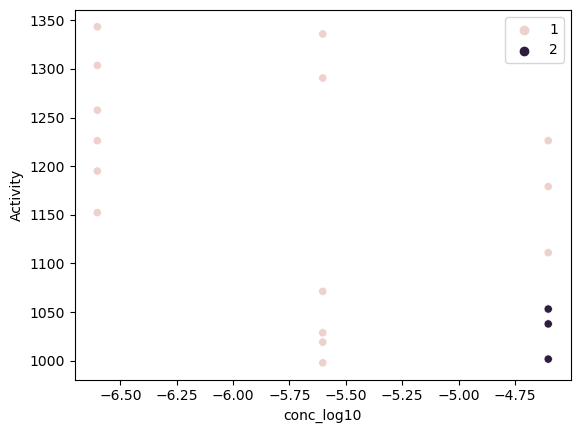

In [4]:
def data_plotter(study, experiment, assay, TI, batchvar='Batch', data=data):
    df = data.loc[(data.Study == study) & (data.Experiment == experiment) & (data.Assay == assay) & (data.TI == TI)]
    fig, ax = plt.subplots()
    sns.scatterplot(x='conc_log10', y='Activity', hue=batchvar, data=df, ax=ax)
    #ax.scatter(x='conc_log10', y='Activity', c=batchvar, data=df, marker='+')
    ax.legend()
    return((fig, ax))

fig, ax = data_plotter('CO28153', 'Aβ release (H4 cells)', 'Aβ42', 'TI16', batchvar='Batch')

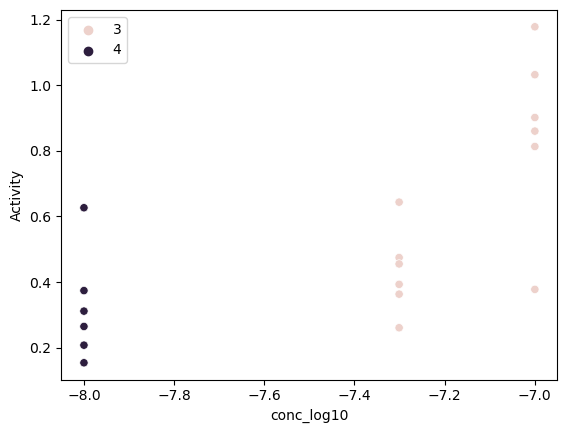

In [5]:
fig, ax = data_plotter('CO28153', 'Tau phosphorylation', 'Tau', 'TI17', batchvar='Plate')

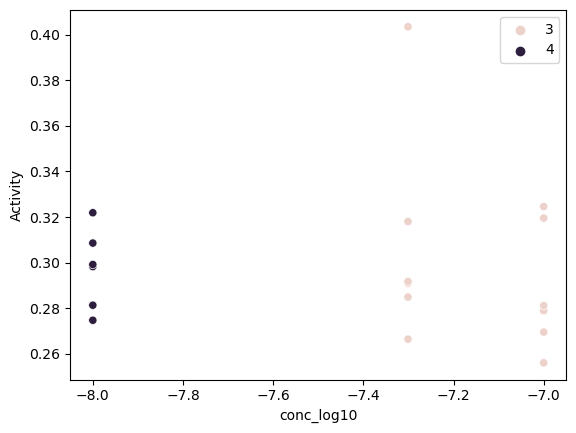

In [6]:
fig, ax = data_plotter('CO28153', 'Tau phosphorylation', 'pT/T ratio', 'TI17', batchvar='Plate')

In [7]:
b1 = (data.Study == 'CO28153') & (data.Experiment == 'Aβ release (H4 cells)') & (data.Assay == 'Aβ42') & (data.TI == 'TI16') & (data.Batch == 2)
b2 = (data.Study == 'CO28153') & (data.Experiment == 'Tau phosphorylation') & (data.Assay == 'Tau') & (data.TI == 'TI17') & (data.Plate == 4)
b3 = (data.Study == 'CO28153') & (data.Experiment == 'Tau phosphorylation') & (data.Assay == 'pT/T ratio') & (data.TI == 'TI17') & (data.Plate == 4)
b4 = (data.Study == 'CO28153') & (data.Experiment == 'Tau phosphorylation') & (data.Assay == 'pTau (T231)') & (data.TI == 'TI17') & (data.Plate == 4)
cba.fit_multiple_units(data.loc[~ (b1 | b2 | b3 | b4)], unit_list=None, do_fit=False, do_print=False)

study  \
CO28151 Aβ clearance (BV2 cells)                    Aβ42 Ly TI1   CO28151   
                                                            TI10  CO28151   
                                                            TI11  CO28151   
                                                            TI12  CO28151   
                                                            TI13  CO28151   
...                                                                   ...   
CO28153 Trophic factor withdrawal (primary neurons) MTT     TI18  CO28153   
                                                            TI19  CO28153   
                                                            TI21  CO28153   
                                                            TI22  CO28153   
                                                            TI23  CO28153   

                                                                                                        exper  \
CO28151 Aβ clearance (BV2 cells)                    Aβ42 Ly TI1                      Aβ clearance (BV2 cells)   
                                                            TI10                     Aβ clearance (BV2 cells)   
                                                            TI11                     Aβ clearance (BV2 cells)   
                                                            TI12                     Aβ clearance (BV2 cells)   
                                                            TI13                     Aβ clearance (BV2 cells)   
...                                                                                                       ...   
CO28153 Trophic factor withdrawal (primary neurons) MTT     TI18  Trophic factor withdrawal (primary neurons)   
                                                            TI19  Trophic factor withdrawal (primary neurons)   
                                                            TI21  Trophic factor withdrawal (primary neurons)   
                                                            TI22  Trophic factor withdrawal (primary neurons)   
                                                            TI23  Trophic factor withdrawal (primary neurons)   

                                                                    assay  \
CO28151 Aβ clearance (BV2 cells)                    Aβ42 Ly TI1   Aβ42 Ly   
                                                            TI10  Aβ42 Ly   
                                                            TI11  Aβ42 Ly   
                                                            TI12  Aβ42 Ly   
                                                            TI13  Aβ42 Ly   
...                                                                   ...   
CO28153 Trophic factor withdrawal (primary neurons) MTT     TI18      MTT   
                                                            TI19      MTT   
                                                            TI21      MTT   
                                                            TI22      MTT   
                                                            TI23      MTT   

                                                                    TI  
CO28151 Aβ clearance (BV2 cells)                    Aβ42 Ly TI1    TI1  
                                                            TI10  TI10  
                                                            TI11  TI11  
                                                            TI12  TI12  
                                                            TI13  TI13  
...                                                                ...  
CO28153 Trophic factor withdrawal (primary neurons) MTT     TI18  TI18  
                                                            TI19  TI19  
                                                            TI21  TI21  
                                                            TI22  TI22  
                                                          

## Fitting model

In [8]:
maindir = '../../results/2024-04-21-cell-bayes/'

if not os.path.exists(maindir + 'idatas/fpaths.csv'):
    idatadf = cba.fit_multiple_units(data, unit_list=None, accept_multi_batches=True)
    idatas = idatadf.idata
    fpathdf = cba.idatas_to_netcdf(idatas.dropna(), subdir='idatas/', maindir=maindir)
    print('idatas written to netcdf')
    # write 3 records for which fit resulted in None instead of arviz.data.inference_data.InferenceData
    fpath = '../../results/2024-04-21-cell-bayes/fits-resulting-in-None.csv'
    idatas.loc[idatas.apply(lambda x: not isinstance(x, az.data.inference_data.InferenceData))].to_csv(fpath)
else:
    idatas = cba.idatas_from_netcdf(subdir='idatas/', maindir=maindir)
    print('idatas read from netcdf')

idatas = cba.sort_index_TI(idatas)
idatas

idatas read from netcdf


study    experiment                                   assay    TI  
CO28151  Aβ clearance (BV2 cells)                     Aβ42 Ly  TI1     (posterior, log_likelihood, sample_stats, obse...
                                                               TI2     (posterior, log_likelihood, sample_stats, obse...
                                                               TI3     (posterior, log_likelihood, sample_stats, obse...
                                                               TI4     (posterior, log_likelihood, sample_stats, obse...
                                                               TI5     (posterior, log_likelihood, sample_stats, obse...
                                                                                             ...                        
CO28153  Trophic factor withdrawal (primary neurons)  MTT      TI18    (posterior, log_likelihood, sample_stats, obse...
                                                               TI19    (posterior, lo

## Fitted curves: posterior sample

In [9]:
plot_sampled_curves = False
fpath_suffix = '' if plot_sampled_curves else '-no-curves'

def assay_plotter(experiment, assay, plot_sampled_curves=plot_sampled_curves, compound_name_title=False):
    unit_list = idatas.loc(axis=0)[:, experiment, assay, :].index.to_numpy()
    fig, ax = cba.plot_multiple_units(unit_list, data, idatas, plot_sampled_curves=plot_sampled_curves, compound_name_title=compound_name_title)
    fig.suptitle(experiment + '\n' + assay)
    return((fig, ax))

In [10]:
for e, a in data[['Experiment', 'Assay']].apply(lambda x: (x.iloc[0], x.iloc[1]), axis=1).unique():
    print(e, a)

LPS neuroinflammation (BV2 cells) IFN-γ
LPS neuroinflammation (BV2 cells) IL-10
LPS neuroinflammation (BV2 cells) IL-1β
LPS neuroinflammation (BV2 cells) IL-2
LPS neuroinflammation (BV2 cells) IL-4
LPS neuroinflammation (BV2 cells) IL-5
LPS neuroinflammation (BV2 cells) IL-6
LPS neuroinflammation (BV2 cells) KC/GRO
LPS neuroinflammation (BV2 cells) TNF-α
LPS neuroinflammation (BV2 cells) MTT
LPS neuroinflammation (BV2 cells) IL-12p70
Tau phosphorylation pT/T ratio
Tau phosphorylation pTau (T231)
Tau phosphorylation Tau
Trophic factor withdrawal (primary neurons) LDH
Trophic factor withdrawal (primary neurons) MTT
Aβ release (H4 cells) Aβ38
Aβ release (H4 cells) Aβ40
Aβ release (H4 cells) Aβ42
Aβ clearance (BV2 cells) Aβ42 Ly
Aβ clearance (BV2 cells) Aβ42 SN


In [11]:
poor_fits = [
    ('CO28151', 'Tau phosphorylation', 'pTau (T231)', 'TI8'),
    ('CO28151', 'Tau phosphorylation', 'pTau (T231)', 'TI10'),
    ('CO28151', 'Tau phosphorylation', 'Tau', 'TI10'),
    ('CO28153', 'Tau phosphorylation', 'Tau', 'TI16'),
    ('CO28153', 'Tau phosphorylation', 'Tau', 'TI17'),
    ('CO28151', 'Trophic factor withdrawal (primary neurons)', 'LDH', 'TI9'),
    ('CO28151', 'Trophic factor withdrawal (primary neurons)', 'MTT', 'TI9'),
    ('CO28151', 'Aβ release (H4 cells)', 'Aβ42', 'TI9'),
    ('CO28151', 'Aβ clearance (BV2 cells)', 'Aβ42 Ly', 'TI10'),
    ('CO28151', 'Aβ clearance (BV2 cells)', 'Aβ42 SN', 'TI3'),
    ('CO28151', 'Aβ clearance (BV2 cells)', 'Aβ42 SN', 'TI4'),
    ('CO28151', 'Aβ clearance (BV2 cells)', 'Aβ42 SN', 'TI10'),
]

### MCMC diagnostics

In [12]:
cba.get_diagnostics_series(idatas, az.ess)

In [13]:
cba.get_diagnostics_series(idatas, az.rhat, vmax=1.1)

In [14]:
cba.get_diagnostics_series(idatas, az.mcse, vmax=10)

In [15]:
df = cba.get_diagnostics_series(idatas, az.mcse, return_df=True).drop('k', level='parameter', axis=0)
df.style.format(precision=3).background_gradient(axis=None, vmin=df.min().min(), vmax=df.max().max(), cmap='hot')

['named-figure/ess.png', 'named-figure/ess.pdf']

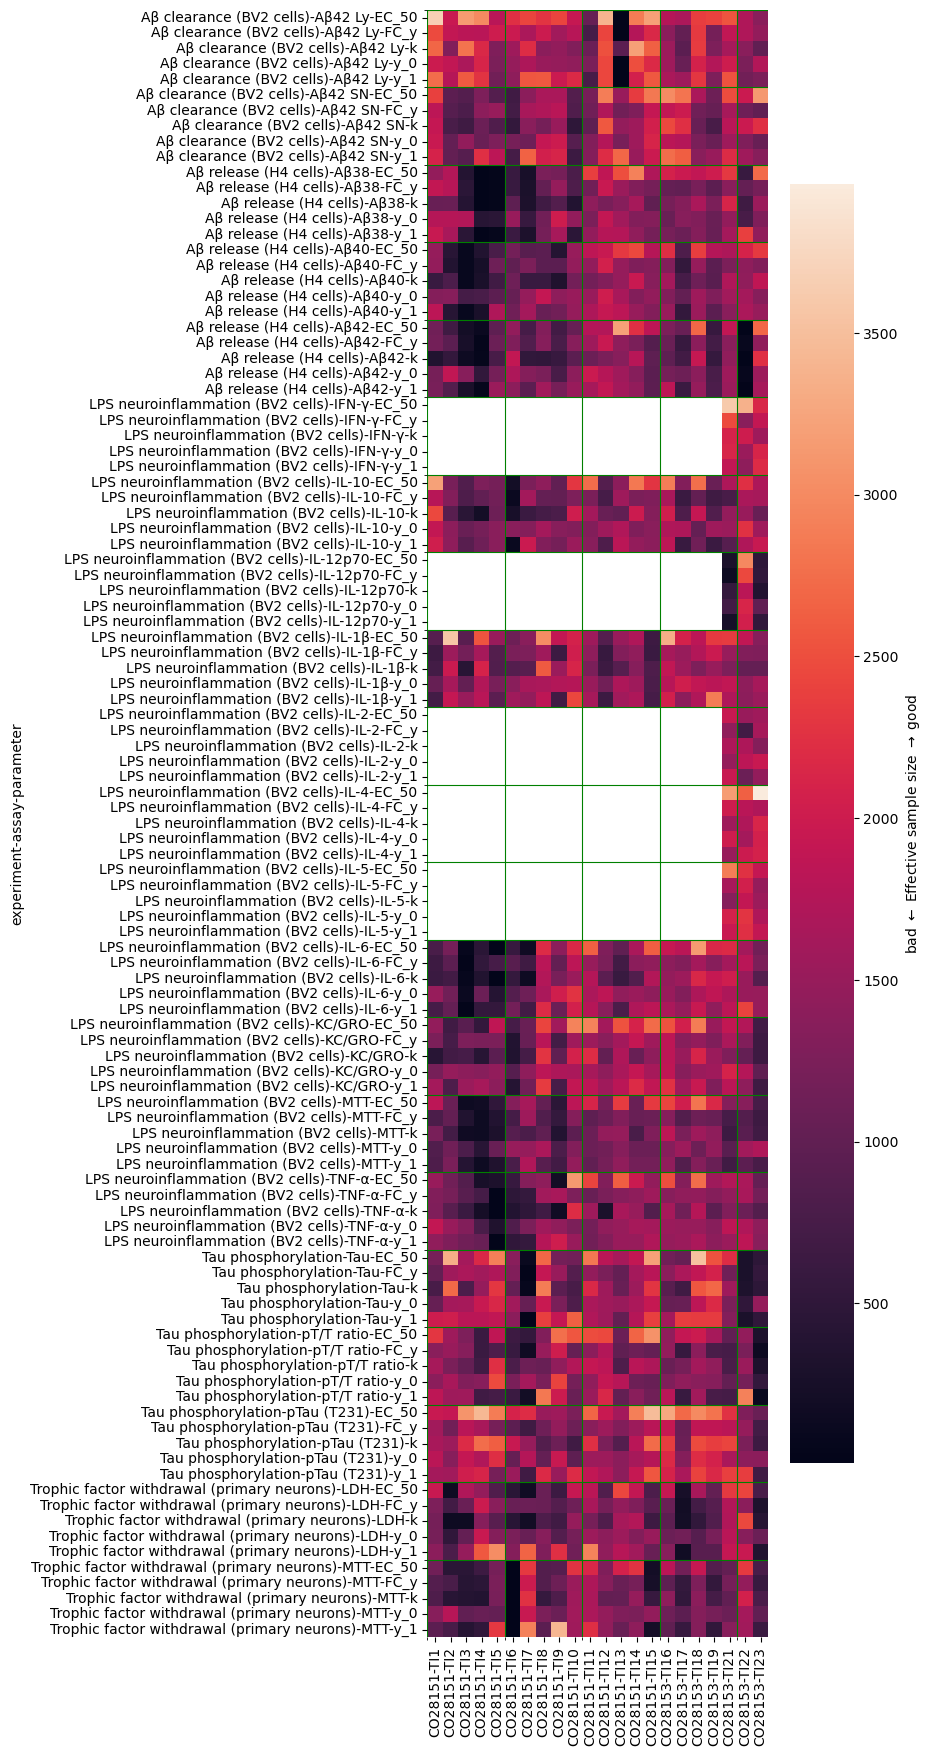

In [16]:
g = cba.diagnostics_series_heatmap(idatas, az.ess, yticklabels=True)
attila_utils.savefig(g.figure, 'ess')

['named-figure/rhat.png', 'named-figure/rhat.pdf']

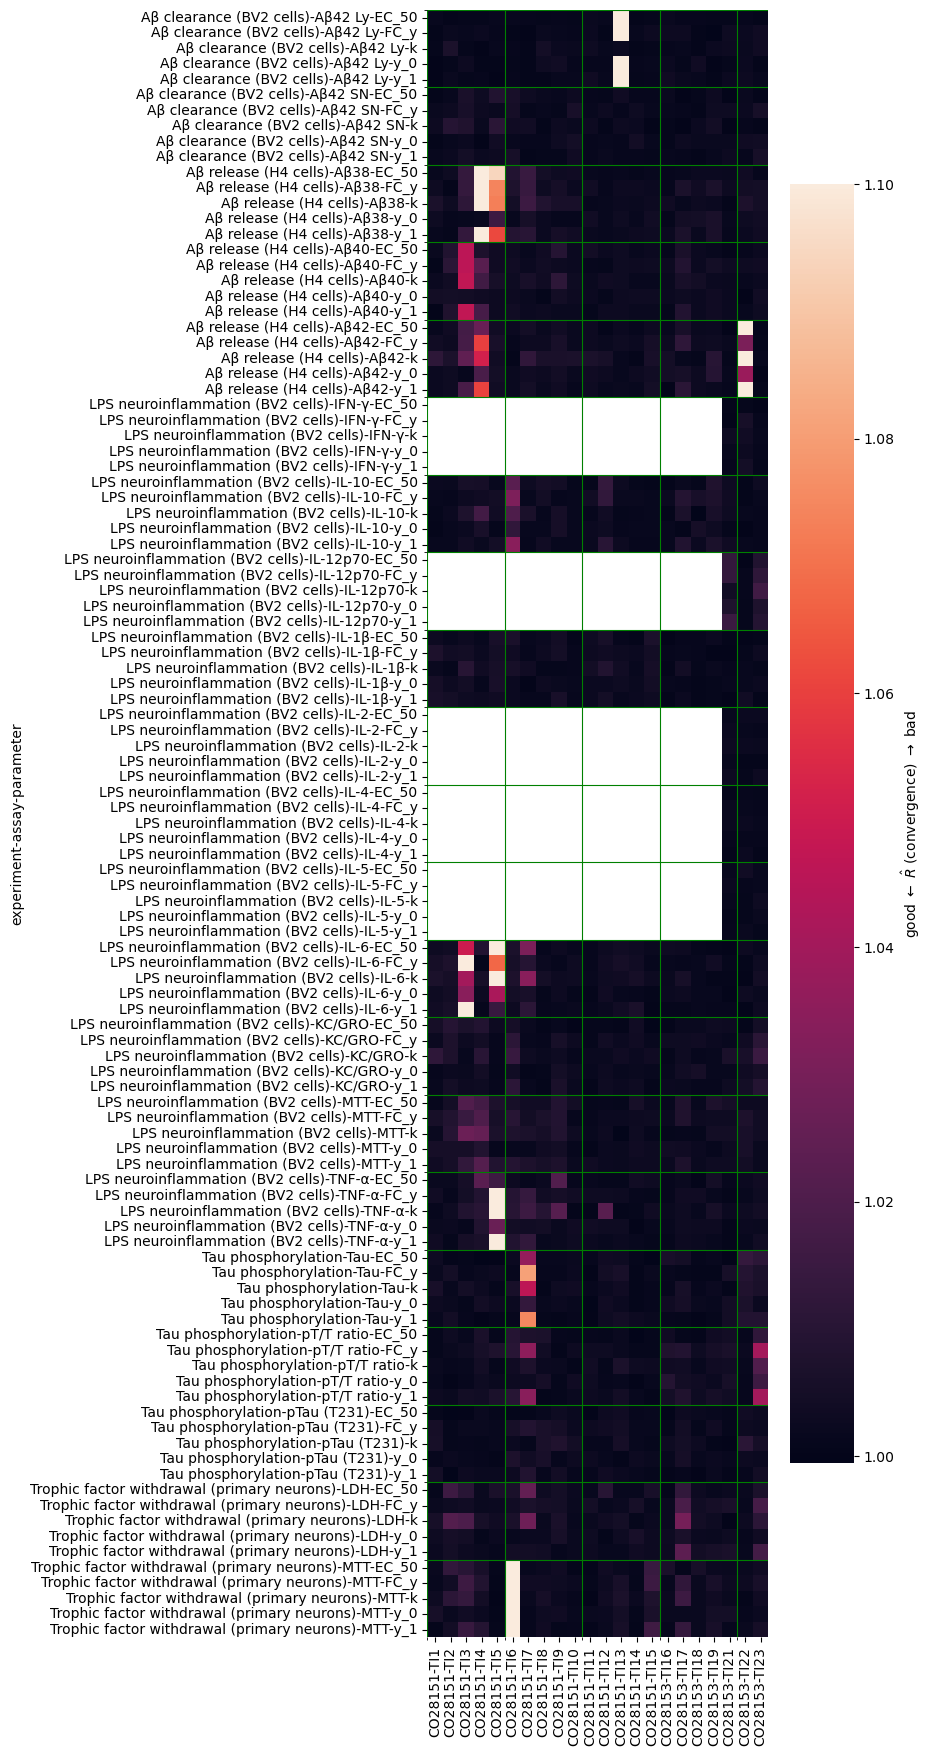

In [17]:
g = cba.diagnostics_series_heatmap(idatas, az.rhat, yticklabels=True, vmax=1.1)
attila_utils.savefig(g.figure, 'rhat')

['named-figure/mcse.png', 'named-figure/mcse.pdf']

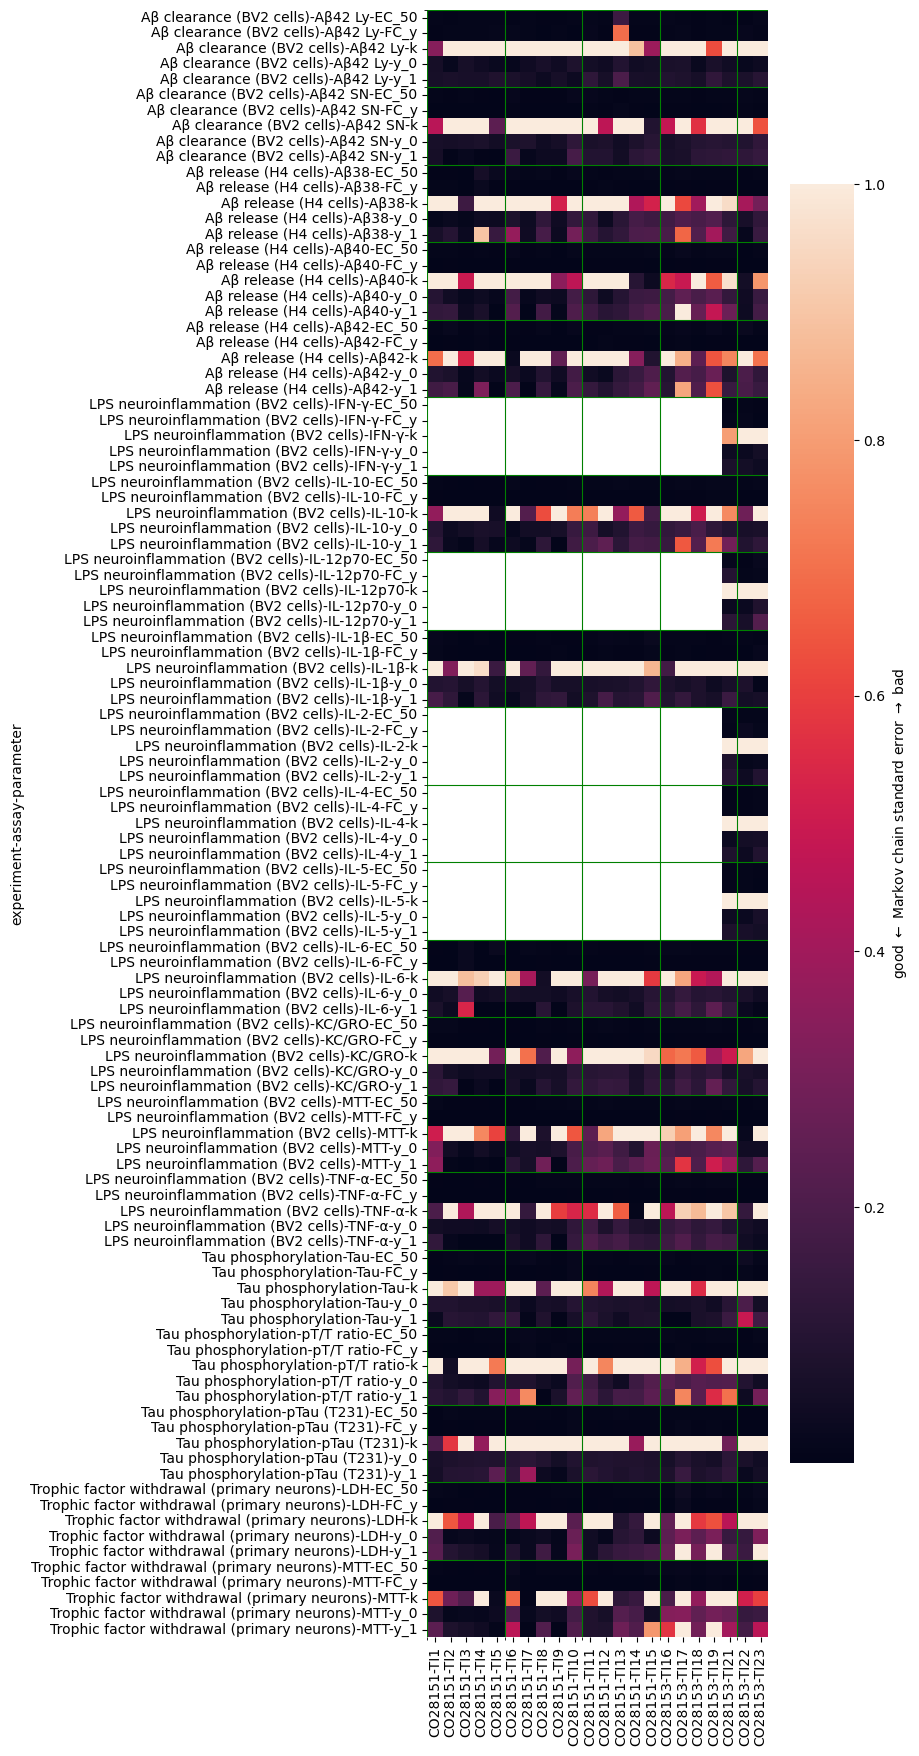

In [18]:
g = cba.diagnostics_series_heatmap(idatas, az.mcse, yticklabels=True, vmax=1)
attila_utils.savefig(g.figure, 'mcse')

## Posteriors and Bayes factors

In [19]:
fpath = '../../results/2024-04-21-cell-bayes/H102_posteriors.csv'
if not os.path.exists(fpath):
    H102_posteriors = cba.get_H102_posterior_from_idatas(idatas, poor_fits)
    H102_posteriors = cba.sort_index_TI(H102_posteriors)
    df = cba.get_TI_name('/Users/jonesa7/CTNS/resources/cell-based-assays/test-items2.csv')
    H102_posteriors['name'] = df.loc[H102_posteriors.index.to_frame().apply(lambda r: (r.loc['study'], r.loc['TI']), axis=1), 'Name'].to_list()
    H102_posteriors.to_csv(fpath)
else:
    H102_posteriors = pd.read_csv(fpath, index_col=[0, 1, 2, 3])
    
H102_posteriors

H1  \
study   experiment                                  assay   TI              
CO28151 Aβ clearance (BV2 cells)                    Aβ42 Ly TI1   0.07300   
                                                            TI2   0.99925   
                                                            TI3   0.25525   
                                                            TI4   0.61225   
                                                            TI5   0.99875   
...                                                                   ...   
CO28153 Trophic factor withdrawal (primary neurons) MTT     TI18  0.00025   
                                                            TI19  0.03300   
                                                            TI21  0.02625   
                                                            TI22  0.00600   
                                                            TI23  0.00000   

                                                                       H0  \
study   experiment                                  assay   TI              
CO28151 Aβ clearance (BV2 cells)                    Aβ42 Ly TI1   0.77600   
                                                            TI2   0.00075   
                                                            TI3   0.69925   
                                                            TI4   0.38000   
                                                            TI5   0.00125   
...                                                                   ...   
CO28153 Trophic factor withdrawal (primary neurons) MTT     TI18  0.99850   
                                                            TI19  0.94700   
                                                            TI21  0.96325   
                                                            TI22  0.94925   
                                                            TI23  0.84425   

                                                                       H2  \
study   experiment                                  assay   TI              
CO28151 Aβ clearance (BV2 cells)                    Aβ42 Ly TI1   0.15100   
                                                            TI2   0.00000   
                                                            TI3   0.04550   
                                                            TI4   0.00775   
                                                            TI5   0.00000   
...                                                                   ...   
CO28153 Trophic factor withdrawal (primary neurons) MTT     TI18  0.00125   
                                                            TI19  0.02000   
                                                            TI21  0.01050   
                                                            TI22  0.04475   
                                                            TI23  0.15575   

                                                                                                      name  
study   experiment                                  assay   TI                                              
CO28151 Aβ clearance (BV2 cells)                    Aβ42 Ly TI1                                  Amiloride  
                                                            TI2             Phenamil methanesulfonate salt  
                                                            TI3             Benzamil hydrochloride hydrate  
                                                            TI4    5-(N,N-Dimethyl)amiloride hydrochloride  
                                                            TI5           5-(N-Ethyl-N-isopropyl)amiloride  
...                                                                                                    ...  
CO28153 Trophic factor withdrawal (primary neurons) MTT     TI18  (R)Hydroxychloroquine racemic, free base  
                                                            TI19  (R)Hydroxychloroqu

In [20]:
BF10 = cba.BF10_from_H102_posteriors_long(cba.pseudocount_to_H102_posteriors(H102_posteriors))
fpath = '../../results/2024-04-21-cell-bayes/BF10.csv'
BF10.to_csv(fpath)
BF10

Study  \
study   experiment                                  assay   TI              
CO28151 Aβ clearance (BV2 cells)                    Aβ42 Ly TI1   CO28151   
                                                            TI2   CO28151   
                                                            TI3   CO28151   
                                                            TI4   CO28151   
                                                            TI5   CO28151   
...                                                                   ...   
CO28153 Trophic factor withdrawal (primary neurons) MTT     TI18  CO28153   
                                                            TI19  CO28153   
                                                            TI21  CO28153   
                                                            TI22  CO28153   
                                                            TI23  CO28153   

                                                                                                   Experiment  \
study   experiment                                  assay   TI                                                  
CO28151 Aβ clearance (BV2 cells)                    Aβ42 Ly TI1                      Aβ clearance (BV2 cells)   
                                                            TI2                      Aβ clearance (BV2 cells)   
                                                            TI3                      Aβ clearance (BV2 cells)   
                                                            TI4                      Aβ clearance (BV2 cells)   
                                                            TI5                      Aβ clearance (BV2 cells)   
...                                                                                                       ...   
CO28153 Trophic factor withdrawal (primary neurons) MTT     TI18  Trophic factor withdrawal (primary neurons)   
                                                            TI19  Trophic factor withdrawal (primary neurons)   
                                                            TI21  Trophic factor withdrawal (primary neurons)   
                                                            TI22  Trophic factor withdrawal (primary neurons)   
                                                            TI23  Trophic factor withdrawal (primary neurons)   

                                                                    Assay  \
study   experiment                                  assay   TI              
CO28151 Aβ clearance (BV2 cells)                    Aβ42 Ly TI1   Aβ42 Ly   
                                                            TI2   Aβ42 Ly   
                                                            TI3   Aβ42 Ly   
                                                            TI4   Aβ42 Ly   
                                                            TI5   Aβ42 Ly   
...                                                                   ...   
CO28153 Trophic factor withdrawal (primary neurons) MTT     TI18      MTT   
                                                            TI19      MTT   
                                                            TI21      MTT   
                                                            TI22      MTT   
                                                            TI23      MTT   

                                                                    TI  \
study   experiment                                  assay   TI           
CO28151 Aβ clearance (BV2 cells)                    Aβ42 Ly TI1    TI1   
                                                            TI2    TI2   
                                                            TI3    TI3   
                                                            TI4    TI4   
                                                            TI5    TI5   
...                                                                ...   
CO

In [1]:
%connect_info

{
  "shell_port": 63906,
  "iopub_port": 63907,
  "stdin_port": 63908,
  "control_port": 63910,
  "hb_port": 63909,
  "ip": "127.0.0.1",
  "key": "d5cc462f-350916d803e6ea89b813d0d9",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "python3",
  "jupyter_session": "/Users/jonesa7/CTNS/notebooks/2024-04-21-cell-bayes/2024-04-21-cell-bayes.ipynb"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-6f17d764-2cc6-4ed0-978b-d7901ffa18ea.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
